# Project 06: Natural Language Processing on DJT Rally Speeches
### Introduction
1. Data source: https://www.kaggle.com/christianlillelund/donald-trumps-rallies
2. Data description
    1. The dataset contains the 23 transcripts of the full speeches that President Donald Trump gave at his rallies in 2020 across US.
3. Objectives
    1. To perform Natural Language Processing with natural language toolkit (NLTK) and SpaCy.
    2. To carry out topic model analysis using the latent Dirichlet allocation (LDA).
4. References
    1. Introduction to LDA: http://blog.echen.me/2011/08/22/introduction-to-latent-dirichlet-allocation/
    2. gensim documentation: https://radimrehurek.com/gensim/auto_examples/index.html
    3. pyLDAvis documentation: https://pyldavis.readthedocs.io/en/latest/index.html  

<a id='Table of Contents'></a>
### Table of Contents
1. What words/nouns did he use most?
    1. Text retrieval
    2. Text cleaning
    3. Frequency distribution of words/nouns
    4. Name Entity Recognition (NER) with SpaCy
2. What topics did he talk about?
    1. Pre-processing and vectorization
    2. Train LDA model
    3. Display LDA model

## 1. What words did he use most? 
### (1) Text retrieval

In [1]:
# Import libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# List all files under the input directory
import os
for dirname, _, filenames in os.walk('C:/Users/james/Desktop/Coding/Kaggle/DJT Speeches'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:/Users/james/Desktop/Coding/Kaggle/DJT Speeches\BemidjiSep18_2020.txt
C:/Users/james/Desktop/Coding/Kaggle/DJT Speeches\CharlestonFeb28_2020.txt
C:/Users/james/Desktop/Coding/Kaggle/DJT Speeches\CharlotteMar2_2020.txt
C:/Users/james/Desktop/Coding/Kaggle/DJT Speeches\ColoradorSpringsFeb20_2020.txt
C:/Users/james/Desktop/Coding/Kaggle/DJT Speeches\DesMoinesJan30_2020.txt
C:/Users/james/Desktop/Coding/Kaggle/DJT Speeches\FayettevilleSep19_2020.txt
C:/Users/james/Desktop/Coding/Kaggle/DJT Speeches\FreelandSep10_2020.txt
C:/Users/james/Desktop/Coding/Kaggle/DJT Speeches\HendersonSep13_2020.txt
C:/Users/james/Desktop/Coding/Kaggle/DJT Speeches\LasVegasFeb21_2020.txt
C:/Users/james/Desktop/Coding/Kaggle/DJT Speeches\LatrobeSep3_2020.txt
C:/Users/james/Desktop/Coding/Kaggle/DJT Speeches\MilwaukeeJan14_2020.txt
C:/Users/james/Desktop/Coding/Kaggle/DJT Speeches\MindenSep12_2020.txt
C:/Users/james/Desktop/Coding/Kaggle/DJT Speeches\MosineeSep17_2020.txt
C:/Users/james/Desktop/Coding/Kaggle/DJT

In [3]:
# Print all speech transcripts from all text files

corpus = ""  # string
for dirname, _, filenames in os.walk('C:/Users/james/Desktop/Coding/Kaggle/DJT Speeches'):
    for filename in filenames:
        file = open(dirname + '/' + filename, "r", encoding="UTF-8")
        corpus = corpus + file.read()
        file.close()

print('Total number of the words: ', len(corpus))
print('\n')

# Print a part of corpus
print(corpus[0:1000])

Total number of the words:  1362867


There's a lot of people. That's great. Thank you very much. Thank you very much. That's a big group of people. This is on fast notice, too. Thank you. But I'm thrilled to be here with the beautiful, great, hardworking people of this incredible state. You're really hardworking American patriots. That's what you are, and a lot of people haven't been treated right until I came along. We've done a lot of work and a lot of good work, and you had your best year ever last year. The state had the best year you've ever had. 46 days from now, we're going to win Minnesota, and we're going to win four more years in the White House. One of the most vital issues in this election is the subject of refugees. You know it. You know it perhaps better than almost anybody. Lots of luck. You're having a good time with the refugees. That's good. We want to have Omar. He said Omar. That's a beauty. How the hell did she win the election? How did she win? It's unbelievable.

### (2) Text Cleaning
#### (a) Removing special characters and stopwords
1. What is a stopword?
    * Stopwords are words which do not add much meaning to a sentence. They can safely be ignored without sacrificing the meaning of the sentence. 
    * For example, the words like the, he, have, etc.

In [4]:
# Import required libraries
import nltk
from nltk.corpus import words as english_words, stopwords
import re

# Replace the newlines and extra spaces, and change all character to lower case
corpus = corpus.replace('\n', ' ').replace('\r', '').replace('  ',' ').lower()

# Remove everything except alphabets
corpus_alphas = re.sub('[^a-zA-Z \n]', '', corpus)

# Remove stopwords
stop_words = set(w.lower() for w in stopwords.words())
corpus_alphas = ' '.join(filter(lambda x: x.lower() not in stop_words, corpus_alphas.split()))
     
# Display a part of speeches
print(corpus_alphas[:1000])

theres lot people thats great thank much thank much thats big group people fast notice thank thrilled beautiful great hardworking people incredible state youre really hardworking american patriots thats lot people havent treated right came along weve done lot work lot good work best year ever last year state best year youve ever days going win minnesota going win four years white house vital issues election subject refugees know know perhaps better almost anybody lots luck youre good time refugees thats good omar said omar thats beauty hell win election win unbelievable every family minnesota needs know sleepy joe bidens extreme plan flood state influx refugees somalia places planet well thats whats happened like omar lot dont biden promised increase manifesto bernie right increase importation refugees dangerous places world including yemen syria somalia congratulations minnesota increase good luck minnesota enjoy dont win dont know going maybe see mike see mike state overrun destroyed

#### (b) Stemming and Lemmatizing
1. What is stemming? 
    * Stemming is a rudimentary rule-based process of stripping the suffixes (“ing”, “ly”, “es”, “s” etc) from a word.
2. What is lemmatization?
    * Lemmatization is an organized & step by step procedure of obtaining the root form of the word, it makes use of vocabulary (dictionary importance of words) and morphological analysis (word structure and grammar relations).

In [5]:
# Import library
from nltk.stem import PorterStemmer

# Stem the corpus
stemmer = nltk.PorterStemmer()
corpus_stemmed = ' '.join(map(lambda str: stemmer.stem(str), corpus_alphas.split()))
print(corpus_stemmed[:1000])

there lot peopl that great thank much thank much that big group peopl fast notic thank thrill beauti great hardwork peopl incred state your realli hardwork american patriot that lot peopl havent treat right came along weve done lot work lot good work best year ever last year state best year youv ever day go win minnesota go win four year white hous vital issu elect subject refuge know know perhap better almost anybodi lot luck your good time refuge that good omar said omar that beauti hell win elect win unbeliev everi famili minnesota need know sleepi joe biden extrem plan flood state influx refuge somalia place planet well that what happen like omar lot dont biden promis increas manifesto berni right increas import refuge danger place world includ yemen syria somalia congratul minnesota increas good luck minnesota enjoy dont win dont know go mayb see mike see mike state overrun destroy biden radic left win that what go happen ive watch year havent treat right treat minnesota right tha

In [6]:
# Import librarm
from nltk.stem import WordNetLemmatizer

# Lemmatize the corpus
lemmatizer = WordNetLemmatizer()
corpus_lemma = ' '.join(map(lambda str: lemmatizer.lemmatize(str), corpus_alphas.split()))
print(corpus_lemma[0:1000])

there lot people thats great thank much thank much thats big group people fast notice thank thrilled beautiful great hardworking people incredible state youre really hardworking american patriot thats lot people havent treated right came along weve done lot work lot good work best year ever last year state best year youve ever day going win minnesota going win four year white house vital issue election subject refugee know know perhaps better almost anybody lot luck youre good time refugee thats good omar said omar thats beauty hell win election win unbelievable every family minnesota need know sleepy joe bidens extreme plan flood state influx refugee somalia place planet well thats whats happened like omar lot dont biden promised increase manifesto bernie right increase importation refugee dangerous place world including yemen syria somalia congratulation minnesota increase good luck minnesota enjoy dont win dont know going maybe see mike see mike state overrun destroyed biden radical

### (3) Frequency Distribution of Words/Nouns
Now I have a relatively cleaner corpus, let's try to visualize the top occuring words in the speeches.

In [7]:
# Import libraries
from nltk import word_tokenize
from nltk.probability import FreqDist

# Tokenize the corpus by words
corpus_wtk = word_tokenize(corpus)
clean_corpus = word_tokenize(corpus_lemma)
clean_corpus1 = word_tokenize(corpus_stemmed)

# Find the frequency
fdist = FreqDist(clean_corpus)

# Print the list of 20 most common words
fdist.most_common(20)

[('going', 1655),
 ('said', 1557),
 ('people', 1458),
 ('know', 1409),
 ('great', 1354),
 ('dont', 1299),
 ('right', 1194),
 ('like', 1067),
 ('year', 1049),
 ('thats', 1005),
 ('theyre', 952),
 ('get', 913),
 ('got', 887),
 ('he', 824),
 ('say', 805),
 ('think', 722),
 ('country', 660),
 ('never', 648),
 ('thing', 624),
 ('good', 622)]

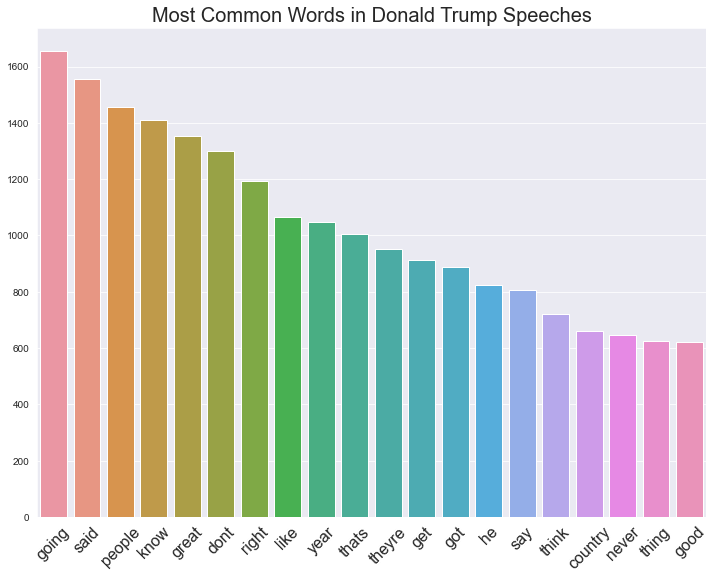

In [8]:
# Import library
from collections import Counter

# Plot 20 most common words
clean_corpus_str = ' '.join(clean_corpus)
word_freq = Counter(clean_corpus_str.split(" "))

sns.set_style('darkgrid')
common_words = [word[0] for word in word_freq.most_common(20)]
common_counts = [word[1] for word in word_freq.most_common(20)]

plt.figure(figsize=(12, 9))
fig = sns.barplot(x=common_words, y=common_counts)
fig.set_xticklabels(common_words, rotation=45, fontsize=16)
plt.title('Most Common Words in Donald Trump Speeches', fontsize=20)
plt.show()

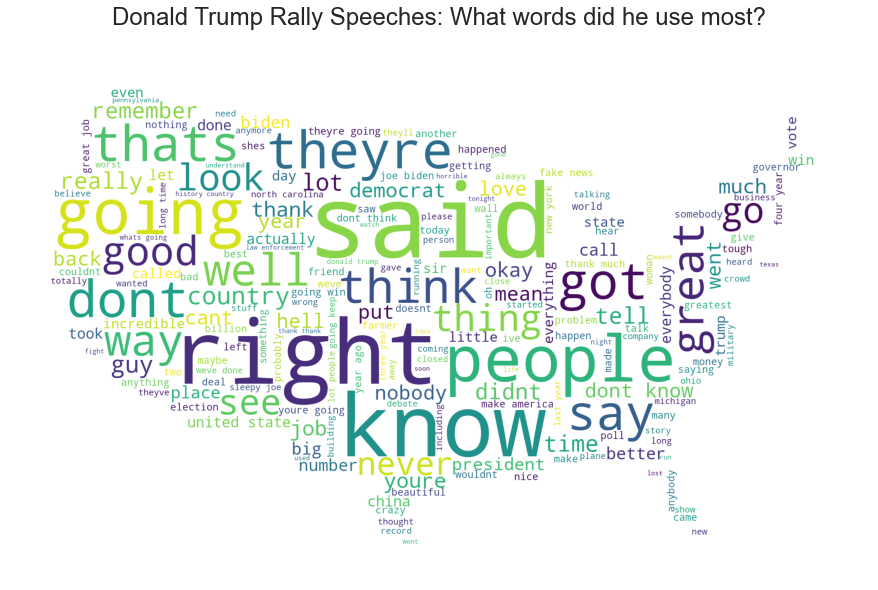

In [9]:
# Import library
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

# Import an image
img = np.array(Image.open('C:/Users/james/Desktop/Coding/Kaggle/USA-States-Color-Map.jpg'))

# Plot wordcloud
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width=1200, height=900, background_color='white', mask=img,
                     stopwords=stopwords, min_font_size=10).generate(clean_corpus_str)

plt.figure(figsize=(12, 9), facecolor=None)
plt.imshow(wordcloud)
plt.rcParams.update({'font.size': 20})
plt.axis('off')
plt.title('Donald Trump Rally Speeches: What words did he use most?')
plt.tight_layout(pad=0)
plt.show()

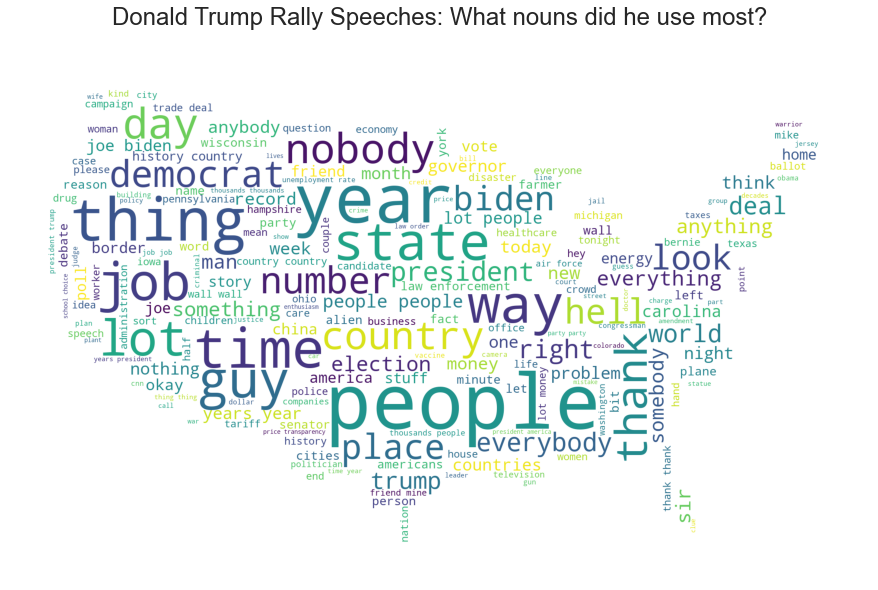

In [27]:
# Collect nouns from the speeches
corpus_wtk_str = ' '.join(corpus_wtk)

tokens = nltk.word_tokenize(corpus_wtk_str)
tagged = nltk.pos_tag(tokens)

tags = []

for i in range(len(tagged)):
    if tagged[i][1][0] == 'N':
        tags.append(tagged[i][0])
        
str_tags = ' '.join([str(elem) for elem in tags])

# Plot wordcloud
wordcloud = WordCloud(width=1200, height=900, background_color='white', mask=img,
                     stopwords=STOPWORDS, min_font_size=10).generate(str_tags)

plt.figure(figsize=(12, 9), facecolor=None)
plt.clf()
plt.imshow(wordcloud)
plt.rcParams.update({'font.size': 20})
plt.axis('off')
plt.title('Donald Trump Rally Speeches: What nouns did he use most?')
plt.tight_layout(pad=0)
plt.show()

### (4) Name Entity Recognition (NER) with SpaCy

In [11]:
# Import one speech text file
base_path = 'C:/Users/james/Desktop/Coding/Kaggle/DJT Speeches'
filename = 'FayettevilleSep19_2020.txt'
path_to_file = os.path.join(base_path, filename)
speech_nc = open(path_to_file, 'r')
text_nc = speech_nc.read()

# Print a part of the text file
print(text_nc[:750])

What a crowd, what a crowd. Get those people over here. See me. Let them come over. What is a big crowd, it's always big. We want to win. We got to win. We want to save our country from the radical left, the radical left crazies. Thank you very much. And hello, North Carolina, hello, North Carolina. We love you, North Carolina. I'm thrilled to be in Fayetteville with thousands of loyal, hard working American patriots. And you know what's going to happen in 45 days from now, and you're watching those polls. They go up, up, up up. 45 days from now, we're going to win North Carolina. We're going to win four more years in the White House. As we meet tonight, our nation mourns the loss of a legal giant Supreme Court Justice, Ruth Bader Ginsburg.


In [12]:
# Import required libraries
import spacy
from spacy import displacy
import en_core_web_sm
nlp = en_core_web_sm.load()
from pprint import pprint

doc = nlp(text_nc)
pprint([(X.text, X.label_) for X in doc.ents])

[('North Carolina', 'GPE'),
 ('North Carolina', 'GPE'),
 ('North Carolina', 'GPE'),
 ('Fayetteville', 'GPE'),
 ('thousands', 'CARDINAL'),
 ('American', 'NORP'),
 ('45 days from now', 'DATE'),
 ('45 days from now', 'DATE'),
 ('North Carolina', 'GPE'),
 ('four more years', 'DATE'),
 ('the White House', 'FAC'),
 ('tonight', 'TIME'),
 ('Supreme Court', 'ORG'),
 ('Ruth Bader Ginsburg', 'PERSON'),
 ('Americans', 'NORP'),
 ('Americans', 'NORP'),
 ('Ginsburg', 'PERSON'),
 ('Scalia', 'PERSON'),
 ('Article II of our constitution', 'LAW'),
 ('the Supreme Court', 'ORG'),
 ('Thom', 'GPE'),
 ('Thom Tillis', 'PERSON'),
 ('North Carolina', 'GPE'),
 ('one', 'CARDINAL'),
 ('29', 'CARDINAL'),
 ('Susan', 'PERSON'),
 ('Susan', 'PERSON'),
 ('Thom Tillis', 'PERSON'),
 ('Republican', 'NORP'),
 ('The Supreme Court', 'ORG'),
 ('2016', 'DATE'),
 ('2018', 'DATE'),
 ('Senate', 'ORG'),
 ('two', 'CARDINAL'),
 ('2018', 'DATE'),
 ('9 million', 'CARDINAL'),
 ('2016', 'DATE'),
 ('Democrats', 'NORP'),
 ('2016', 'DATE'),


In [13]:
# Visualize entity recogniztion in the text
displacy.render(doc, style="ent", jupyter=True)

## 2. What topics did he talk about?
### Topic Modeling: Latent Dirichlet Allocation (LDA)
1. Topic modeling refers to the task of identifying topics that best describe a set of documents. There are several existing algorithms that can be used to perform the topic modeling, and the latent Dirichlet allocation (LDA) is one of them.
2. In natural language processing, to tell briefly, LDA imagines a fixed set of topics. Each topic represents a set of words. And the goal of LDA is to map all the documents to the topics in a way, such that the words in each document are mostly captured by those imaginary topics.

### (1) Pre-processing and vectorization
As part of preprocessing, I will:
1. Tokenize (split the documents into tokens)
2. Lemmatize the tokens
3. Compute bigrams
4. Compute a bag-of-words(BOW) representation of the data

In [14]:
# Import textual data: documents
corpus_lda = list()
for dirname, _, filenames in os.walk('C:/Users/james/Desktop/Coding/Kaggle/DJT Speeches'):
    for filename in filenames:
        file_path = os.path.join(dirname, filename)
        print(file_path)
        text = open(file_path, 'r', encoding="UTF-8").read()
        corpus_lda.append(text)

print(f"Total number of the documents: {len(corpus_lda)}")

C:/Users/james/Desktop/Coding/Kaggle/DJT Speeches\BemidjiSep18_2020.txt
C:/Users/james/Desktop/Coding/Kaggle/DJT Speeches\CharlestonFeb28_2020.txt
C:/Users/james/Desktop/Coding/Kaggle/DJT Speeches\CharlotteMar2_2020.txt
C:/Users/james/Desktop/Coding/Kaggle/DJT Speeches\ColoradorSpringsFeb20_2020.txt
C:/Users/james/Desktop/Coding/Kaggle/DJT Speeches\DesMoinesJan30_2020.txt
C:/Users/james/Desktop/Coding/Kaggle/DJT Speeches\FayettevilleSep19_2020.txt
C:/Users/james/Desktop/Coding/Kaggle/DJT Speeches\FreelandSep10_2020.txt
C:/Users/james/Desktop/Coding/Kaggle/DJT Speeches\HendersonSep13_2020.txt
C:/Users/james/Desktop/Coding/Kaggle/DJT Speeches\LasVegasFeb21_2020.txt
C:/Users/james/Desktop/Coding/Kaggle/DJT Speeches\LatrobeSep3_2020.txt
C:/Users/james/Desktop/Coding/Kaggle/DJT Speeches\MilwaukeeJan14_2020.txt
C:/Users/james/Desktop/Coding/Kaggle/DJT Speeches\MindenSep12_2020.txt
C:/Users/james/Desktop/Coding/Kaggle/DJT Speeches\MosineeSep17_2020.txt
C:/Users/james/Desktop/Coding/Kaggle/DJT

In [15]:
# Display the documents
print(len(corpus_lda))
print(corpus_lda[0][:500])

23
There's a lot of people. That's great. Thank you very much. Thank you very much. That's a big group of people. This is on fast notice, too. Thank you. But I'm thrilled to be here with the beautiful, great, hardworking people of this incredible state. You're really hardworking American patriots. That's what you are, and a lot of people haven't been treated right until I came along. We've done a lot of work and a lot of good work, and you had your best year ever last year. The state had the best y


In [16]:
# Import library
from nltk.tokenize import RegexpTokenizer

# Split the documents into tokens
tokenizer = RegexpTokenizer(r'\w+')
for idx in range(len(corpus_lda)): 
    corpus_lda[idx] = corpus_lda[idx].lower()   # Convert to lowercase 
    corpus_lda[idx] = tokenizer.tokenize(corpus_lda[idx])   # Split into words
    
# Remove numbers, but not words that contain numbers
corpus_lda = [[token for token in doc if not token.isnumeric()] for doc in corpus_lda]

# Remove words that are only one character
corpus_lda = [[token for token in doc if len(token) > 1] for doc in corpus_lda]

In [17]:
# Import library
from nltk.stem.wordnet import WordNetLemmatizer

# Lemmatize the documents
lemmatizer = WordNetLemmatizer()
corpus_lda = [[lemmatizer.lemmatize(token) for token in doc] for doc in corpus_lda]

In [18]:
# Compute bigrams
from gensim.models import Phrases

# Add bigrams and trigrams to docs (only ones that appear 3 times or more)
bigram = Phrases(corpus_lda, min_count=3)
for idx in range(len(corpus_lda)):
    for token in bigram[corpus_lda[idx]]:
        if '_' in token:
            # Token is a bigram, add to document
            corpus_lda[idx].append(token)

In [19]:
# Remove rare and common tokens
from gensim.corpora import Dictionary

# Create a dictionary representation of the documents (= sentences)
dictionary = Dictionary(corpus_lda)

# Filter out words that occur less than 1 documents, or more than 50% of the documents
dictionary.filter_extremes(no_below=1, no_above=0.5)

In [20]:
# Bag-of-words representation of the documents
corpus_lda = [dictionary.doc2bow(doc) for doc in corpus_lda]

print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus_lda))

Number of unique tokens: 6512
Number of documents: 23


### (2) Train LDA model

In [29]:
# Train LDA model
# Import library
from gensim.models import LdaModel

# Set training parameters
num_topics = 5
chunksize = 25
passes = 100
iterations = 400
eval_every = None

# Make a index to word dictionary
temp = dictionary[0]  # This is only to "load" the dictionary
id2word = dictionary.id2token

model = LdaModel(corpus=corpus_lda,
                 id2word=id2word,
                 chunksize=chunksize,
                 alpha='auto',
                 eta='auto',
                 iterations=iterations,
                 num_topics=num_topics,
                 passes=passes,
                 eval_every=eval_every
                )

In [30]:
top_topics = model.top_topics(corpus_lda)

# Average topic coherence is the sum of optic coherences of all topics, divided by the number of topics
avg_topic_coherence = sum([t[1] for t in top_topics]) / num_topics
print('Average topic coherence: %.4f.' % avg_topic_coherence)

from pprint import pprint
pprint(top_topics)

Average topic coherence: -2.2088.
[([(0.0053414674, 'pennsylvania'),
   (0.0036839605, 'suburb'),
   (0.0032937631, 'john'),
   (0.0031376379, 'nevada'),
   (0.002808022, 'fracking'),
   (0.002200902, 'endorsed'),
   (0.0020447634, 'agenda'),
   (0.0018870089, 'kamala'),
   (0.001828232, 'ad'),
   (0.0018050144, 'nobel'),
   (0.0017901344, 'auto'),
   (0.0017825605, 'mask'),
   (0.0016546261, 'james'),
   (0.0016545226, 'ventilator'),
   (0.001634419, 'sean'),
   (0.0016255394, 'rioter'),
   (0.0015764323, 'china_virus'),
   (0.0015747504, 'plague'),
   (0.0015670941, 'sending'),
   (0.0015670623, 'endless')],
  -0.5692289740126706),
 ([(0.004351364, 'jersey'),
   (0.004096891, 'new_jersey'),
   (0.0031753734, 'swamp'),
   (0.002874685, 'tim'),
   (0.0024427855, 'movie'),
   (0.0023155813, 'nevada'),
   (0.0023153494, 'mini_mike'),
   (0.0023030941, 'mini'),
   (0.002124755, 'farm'),
   (0.0021206974, 'phrase'),
   (0.0020730803, 'washington_democrat'),
   (0.0020611002, 'jeff'),
   (0

### (3) Display LDA model

In [31]:
# Import library
import pyLDAvis.gensim

# Visualize LDA
corpus_lda_vis = pyLDAvis.gensim.prepare(model, corpus_lda, dictionary, sort_topics=False)
pyLDAvis.display(corpus_lda_vis)

In [24]:
# Save LDA visualization to a local directory as a html file
pyLDAvis.save_html(corpus_lda_vis, './corpus_lda_vis_' + str(num_topics) + '.html')

### <a href='#Table of Contents'>[Move to Table of Contents]</a>